# Data Wrangling With Pandas

## Introduction to Data Wrangling

Data wrangling, often known as **data cleaning or preprocessing**, is the process of transforming raw data into a structured, clean, and analysis-ready format. It involves a series of operations such as parsing, cleaning, validating, and transforming data to address issues like missing values, duplicates, and inconsistent formatting.


**Why It Matters**:
- **Quality and Accuracy**: The accuracy of any analysis, modeling, or decision-making is highly dependent on the quality of the input data. Data wrangling ensures that the data is accurate, consistent, and reliable.
- **Efficiency**: Clean and well-structured data reduces the time and computational resources needed for subsequent analysis, improving overall workflow efficiency.
- **Foundation for Analysis**: Just as a building requires a solid foundation, effective data analysis requires well-prepared data. Poor data quality can lead to erroneous insights and misinformed decisions.


**Common Data Issues Encountered During Wrangling**:
- **Missing Values**: Data points that are absent or unrecorded in the dataset. Can lead to biases or errors in statistical analyses and machine learning models if not handled appropriately.
- **Duplicates**: Repeated records or entries that appear more than once in the dataset. Can inflate the importance of certain data points, skewing results and analyses.
- **Outliers**: Data points that differ significantly from other observations, often due to variability or errors. They can distort statistical measures (mean, standard deviation) and lead to misinterpretations.
- **Inconsistent Formatting**: Variations in data presentation such as date formats, capitalization, or numerical representations. Inconsistent data can hinder accurate aggregation, filtering, and analysis.
- **Erroneous Data**: Incorrect or illogical data entries that may need correction or removal.
- **Noise**: Random errors or irrelevant information embedded in the dataset.

Data cleaning tasks are often reported to take up 80% or more of an analyst’s time. Fortunately, pandas, along with the built-in Python language features, provides you with a high-level, flexible, and fast set
of tools to enable you to manipulate data into the right form.

In [262]:
from pathlib import Path

import numpy as np
import pandas as pd


We can start by reading the data into pandas.

In [263]:
# Dataset 1: laptops
dataset_path_laptops = Path.cwd().parent / "data" / "INPUT_laptops.csv"  # dataset encoding is Latin-1
laptops = pd.read_csv(dataset_path_laptops, encoding="Latin-1")
laptops.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [264]:
# Dataset 2: f500
dataset_path = Path.cwd().parent / "data" / "f500.csv"
f500 = pd.read_csv(dataset_path)
f500.head()

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Eenergy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


## Data Inspection and Basic Manipulations

Before diving into advanced analyses, it is crucial to understand the structure and quality of your data. Pandas provides a rich set of tools to quickly inspect, summarize, and manipulate datasets. 

### Data Inspection

Check the size, number of rows and columns, of the dataset.

In [265]:
print(f"Number of rows: {laptops.shape[0]}")
print(f"Number of columns: {laptops.shape[1]}")
print(f"Column names: {laptops.columns}")

Number of rows: 1303
Number of columns: 13
Column names: Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')


Show the first 3 rows of the dataset.

In [266]:
laptops.head(3)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"


Show the last 3 rows of the dataset.

In [267]:
laptops.tail(3)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,"229,00"
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,"764,00"
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,"369,00"


Show 3 random rows:

In [268]:
laptops.sample(3)  # Randomly sample n rows from the DataFrame,
# useful for getting a diverse glimpse of the data.

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
147,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,"15.6""",Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows,10,2kg,"344,00"
302,Lenovo,IdeaPad 320-17IKB,Notebook,"17.3""",1600x900,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Nvidia GeForce GTX 940M,Windows,10,2.8kg,"649,00"
280,Lenovo,IdeaPad 320-17IKB,Notebook,"17.3""",1600x900,Intel Core i7 7500U 2.7GHz,6GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows,10,2.8kg,"859,00"


Displays the data type of each column, which is crucial for ensuring proper data manipulation and analysis.

In [269]:
laptops.dtypes

Manufacturer                object
Model Name                  object
Category                    object
Screen Size                 object
Screen                      object
CPU                         object
RAM                         object
 Storage                    object
GPU                         object
Operating System            object
Operating System Version    object
Weight                      object
Price (Euros)               object
dtype: object

Show the dataset information. Provides a concise summary of the DataFrame, including the number of non-null entries, data types of each column, and memory usage.

In [270]:
laptops.info(memory_usage="deep")  # memory_usage="deep" to get the exact memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1302 non-null   object
 2   Category                  1302 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 979.9 KB


In [271]:
f500.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company                   500 non-null    object 
 1   rank                      500 non-null    int64  
 2   revenues                  500 non-null    int64  
 3   revenue_change            498 non-null    float64
 4   profits                   499 non-null    float64
 5   assets                    500 non-null    int64  
 6   profit_change             436 non-null    float64
 7   ceo                       500 non-null    object 
 8   industry                  500 non-null    object 
 9   sector                    500 non-null    object 
 10  previous_rank             500 non-null    int64  
 11  country                   500 non-null    object 
 12  hq_location               500 non-null    object 
 13  website                   500 non-null    object 
 14  years_on_g

Dataframe Describe Method [`pandas.DataFrame.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html): Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. 

In [272]:
f500.describe()  # The result will include all numeric columns.

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
count,500.000000,500.000000,498.000000,499.000000,5.000000e+02,436.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,250.500000,55416.358000,4.538353,3055.203206,2.436323e+05,24.152752,222.134000,15.036000,1.339983e+05,30628.076000
std,144.481833,45725.478963,28.549067,5171.981071,4.851937e+05,437.509566,146.941961,7.932752,1.700878e+05,43642.576833
min,1.000000,21609.000000,-67.300000,-13038.000000,3.717000e+03,-793.700000,0.000000,1.000000,3.280000e+02,-59909.000000
25%,125.750000,29003.000000,-5.900000,556.950000,3.658850e+04,-22.775000,92.750000,7.000000,4.293250e+04,7553.750000
50%,250.500000,40236.000000,0.550000,1761.600000,7.326150e+04,-0.350000,219.500000,17.000000,9.291050e+04,15809.500000
75%,375.250000,63926.750000,6.975000,3954.000000,1.805640e+05,17.700000,347.250000,23.000000,1.689172e+05,37828.500000
max,500.000000,485873.000000,442.300000,45687.000000,3.473238e+06,8909.500000,500.000000,23.000000,2.300000e+06,301893.000000


In [273]:
f500.describe(include=["O"])  # The result will include all object columns.

,company,ceo,industry,sector,country,hq_location,website
count,500,500,500,500,500,500,500
unique,500,500,58,26,34,235,500
top,AutoNation,Michael J. Jackson,Banks: Commercial and Savings,Financials,USA,"Beijing, China",http://www.autonation.com
freq,1,1,51,118,132,56,1


In [274]:
laptops.describe()  # No numeric columns, so object columns are included.

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
count,1303,1302,1302,1303,1303,1303,1303,1303,1303,1303,1133,1303,1303
unique,19,618,6,18,40,122,9,40,115,7,4,179,791
top,Dell,XPS 13,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,2.2kg,"1099,00"
freq,297,30,726,665,507,188,619,411,281,1125,1072,121,14


### Cleaning Column Names

<p>The column labels have a variety of upper and lowercase letters, as well as spaces and parentheses, which will make them harder to work with and read. One noticeable issue is that the <code>" Storage"</code> column name has a space in front of it. These quirks with column labels can sometimes be hard to spot, so removing extra whitespaces from all column names will save us more work in the long run.</p>

In [275]:
# laptops["Storage"] # KeyError: 'Storage'

In [276]:
laptops[" Storage"].head()

0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name:  Storage, dtype: object

We can access the column axis of a dataframe using the <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/basics.html#attributes-and-the-raw-ndarray-s"><code>DataFrame.columns</code> attribute</a>. 

In [277]:
laptops_columns = laptops.columns

print(laptops_columns)

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')


<p>However, the column labels still have a variety of upper and lowercase letters, as well as parentheses, which will make them harder to work with and read. Let's finish cleaning our column labels by:</p>
<ul>
<li>Replacing spaces with underscores.</li>
<li>Removing special characters.</li>
<li>Making all labels lowercase.</li>
<li>Shortening any long column names.</li>
</ul>
<p>We can create a function that uses <a target="_blank" href="https://docs.python.org/3/library/stdtypes.html#string-methods">Python string methods</a> to clean our column labels, and then again use a loop to apply that function to each label.

In [278]:
def clean_laptop_dataset_column_name(column_name: str) -> str:
    """Clean a column name from the laptops dataset."""
    col = column_name.strip()
    col = col.replace("Operating System", "os")
    col = col.replace(" ", "_")
    col = col.replace("(", "")
    col = col.replace(")", "")
    return col.lower()


laptops_columns_new = [clean_laptop_dataset_column_name(col) for col in laptops_columns]
print("Cleaned column names:", laptops_columns_new)

# Assign the new column names to the dataframe
laptops.columns = laptops_columns_new

Cleaned column names: ['manufacturer', 'model_name', 'category', 'screen_size', 'screen', 'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_euros']


In [279]:
laptops.head(2)

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


### Changing the Index

A pandas Index extends the functionality of NumPy arrays to allow for more versatile slicing and labeling. 

In [280]:
# Check if the values are unique in the column "company"
f500["company"].is_unique

True

Let’s replace the existing index with this column using set_index:

In [281]:
f500 = f500.set_index("company")
f500.head(2)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
company,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Eenergy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456


> A pandas Index doesn’t make any guarantee of being unique, although many indexing and merging operations will notice a speedup in runtime if it is.

## String Manipulation

String manipulation involves transforming, analyzing, and cleaning text data. In data wrangling, textual data often contains inconsistencies, unwanted characters, and irregular formats that must be standardized before analysis.

Pandas provides a powerful string accessor (`.str`) that allows vectorized string operations over Series. This makes it highly efficient for processing large datasets

<div><p>In the laptops dataset we observed earlier that all 13 columns have the <code>object</code> dtype, meaning they're stored as strings.

In [282]:
laptops.loc[:5, "category":"screen"]

,category,screen_size,screen
0,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600
1,Ultrabook,"13.3""",1440x900
2,Notebook,"15.6""",Full HD 1920x1080
3,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800
4,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600
5,Notebook,"15.6""",1366x768


<p>Of these three columns, we have three different types of text data:</p>
<ul>
<li><code>category</code>: Purely text data - there are no numeric values.</li>
<li><code>screen_size</code>: Numeric data stored as text data because of the <code>"</code> character.</li>
<li><code>screen</code>: A combination of pure text data with numeric data.</li>
</ul>

<p>The first step is to <strong>explore the data</strong>.  One of the best ways to do this is to use the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html"><code>Series.unique()</code> method</a> to view all of the unique values in the column:</p>
</div>

In [283]:
print(laptops["screen_size"].dtype)

object


In [284]:
laptops["screen_size"].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

<div>
<p>Our next step is to <strong>identify patterns and special cases</strong>. We can observe the following:</p>
<ul>
<li>All values in this column follow the same pattern - a series of digit and period characters, followed by a quote character (<code>"</code>). </li>
<li>There are no special cases. Every value matches the same pattern.</li>
<li>We'll need to convert the column to a <code>float</code> dtype, as the <code>int</code> dtype won't be able to store the decimal values.</li>
</ul>
</div>

<p>To convert columns to numeric dtypes, we'll have to first <strong>remove the non-digit characters</strong>.</p>

The pandas library contains dozens of <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary">vectorized string methods</a> we can use to manipulate text data, many of which perform the same operations as Python string methods.

In [285]:
laptops["screen_size"] = laptops["screen_size"].str.replace('"', "")
# convert the column to a numeric type
laptops["screen_size"] = laptops["screen_size"].astype("float")
print("New unique values:", laptops["screen_size"].unique())

New unique values: [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


In [286]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1303 non-null   object 
 1   model_name    1302 non-null   object 
 2   category      1302 non-null   object 
 3   screen_size   1303 non-null   float64
 4   screen        1303 non-null   object 
 5   cpu           1303 non-null   object 
 6   ram           1303 non-null   object 
 7   storage       1303 non-null   object 
 8   gpu           1303 non-null   object 
 9   os            1303 non-null   object 
 10  os_version    1133 non-null   object 
 11  weight        1303 non-null   object 
 12  price_euros   1303 non-null   object 
dtypes: float64(1), object(12)
memory usage: 132.5+ KB


In [287]:
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


<div><p>Now that we've converted our column to numeric dtypes, the final step is to <strong>rename the column</strong>. This is an optional step, and can be useful if the non-digit values contain information that helps us understand the data. </p>

In [288]:
laptops = laptops.rename(columns={"screen_size": "screen_size_inches"})
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


In [289]:
# Converting the column "ram" to a numeric type and renaming it
print(f"Unique values before conversion: {laptops['ram'].unique()}")
laptops["ram"] = laptops["ram"].str.replace("GB", "").astype("int")
print(f"Unique values after conversion: {laptops['ram'].unique()}")
laptops = laptops.rename(columns={"ram": "ram_gb"})
laptops.head(2)

Unique values before conversion: ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
Unique values after conversion: [ 8 16  4  2 12  6 32 24 64]


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


In [290]:
# Converting the column "weight" to a numeric type and renaming it
print(f"Unique values before conversion: {laptops['weight'].unique()[-20:]}")
# pay attention to the kgs value
laptops["weight"] = laptops["weight"].str.replace("kgs", "").str.replace("kg", "").astype("float")
laptops = laptops.rename(columns={"weight": "weight_kg"})
laptops.head(2)

Unique values before conversion: ['2.07kg' '2.38kg' '3.58kg' '1.08kg' '2.20kg' '2.75kg' '1.70kg' '2.99kg'
 '1.11kg' '2.09kg' '4kgs' '3.0kg' '0.99kg' '3.52kg' '2.591kg' '2.21kg'
 '3.3kg' '2.191kg' '2.34kg' '4.0kg']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,"898,94"


In [291]:
# Convert the price_euros column to a numeric dtype
laptops["price_euros"] = laptops["price_euros"].str.replace(",", ".").astype("float")
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94


### Extracting Values from Strings

<div><p>Sometimes, it can be useful to extract non-numeric values from within strings. Let's look at the first five values from the <code>gpu</code> (graphics processing unit) column:</p>
</div>

In [292]:
print(laptops["gpu"].head())

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: gpu, dtype: object


<p>Because each manufacturer is followed by a whitespace character, we can use the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html"><code>Series.str.split()</code> method</a> to extract this data.

<p>This method splits each string on the whitespace; the result is a series containing individual Python lists. Also note that we used parentheses to method chain over multiple lines, which makes our code easier to read.</p>

In [293]:
print(laptops["gpu"].head().str.split())

0    [Intel, Iris, Plus, Graphics, 640]
1           [Intel, HD, Graphics, 6000]
2            [Intel, HD, Graphics, 620]
3               [AMD, Radeon, Pro, 455]
4    [Intel, Iris, Plus, Graphics, 650]
Name: gpu, dtype: object


In [294]:
# Extract the GPU manufacturer from the GPU column and create a new column
laptops["gpu_manufacturer"] = laptops["gpu"].str.split().str[0]
print(f"Unique values in the new column: {laptops['gpu_manufacturer'].unique()}")
laptops.head(2)

Unique values in the new column: ['Intel' 'AMD' 'Nvidia' 'nvidia' 'nevidia' 'NVIDIA' 'ARM']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,Intel


In [295]:
# Standardizing Text: Uniformity is key when dealing with text data.
# Converting all text to lower or upper case can prevent mismatches during comparisons
laptops["gpu_manufacturer"] = laptops["gpu_manufacturer"].str.lower().str.strip()
# Replace the nevidia typo with nvidia
laptops = laptops.replace("nevidia", "nvidia")
print(f"Unique values in the new column: {laptops['gpu_manufacturer'].unique()}")
laptops.head(2)


Unique values in the new column: ['intel' 'amd' 'nvidia' 'arm']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,intel


In [296]:
# Extract the CPU manufacturer from the CPU column and create a new column
laptops["cpu_manufacturer"] = laptops["cpu"].str.split().str[0]
print(f"Unique values in the new column: {laptops['cpu_manufacturer'].unique()}")
laptops["cpu_manufacturer"] = laptops["cpu_manufacturer"].str.lower().str.strip()
laptops.head(2)

Unique values in the new column: ['Intel' 'AMD' 'intel' 'Samsung']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,intel,intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,intel,intel


In [297]:
# Extract the screen resolution from the screen column
resolution = laptops["screen"].str.split(" ").str[-1]
resolution_splitted = resolution.str.split("x")
laptops["screen_width_px"] = resolution_splitted.str[0].astype("int")
laptops["screen_high_px"] = resolution_splitted.str[1].astype("int")
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,intel,intel,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,intel,intel,1440,900


### Regular Expressions in Pandas

Regular Expressions (regex) are powerful patterns used to match, search, and manipulate strings. They allow you to define complex search patterns to extract or replace text in your data.

Regex is indispensable when working with messy or unstructured text data. In Pandas, regex simplifies tasks like extracting substrings, cleaning text, and validating formats.

Key Pandas String Methods That Support Regex:
- `str.contains()`: Check if a pattern exists within each string.
- `str.extract()`: Extract capture groups from each string using a regex pattern.
- `str.replace()`: Replace occurrences of a regex pattern with a specified string.
- `str.split()`: Split strings using a regex as the delimiter.

**Introduction to Using re in Python**

The re module in Python provides a robust toolkit for working with regular expressions—a powerful language for matching, searching, extracting, and replacing text patterns. Regular expressions allow you to define complex search patterns with precision and efficiency, which is particularly useful when dealing with unstructured or semi-structured data.



In [298]:
import re

re.search(r"Order#\d{5}", "LALALALOrder#12345LALALAALA").group()  # type: ignore  # noqa: PGH003


'Order#12345'

Imagine you have a log of customer orders in a free-form text format. Each log entry contains a customer name, email, order ID, order date, order amount, and shipping date. The data is semi-structured and includes a mix of literals and variable content.

In [299]:
# The example shows how multiple pieces of information can be extracted from a single text
# string using a composite regular expression.

import re

log_text = """
Customer: John Doe <john.doe@example.com> placed Order#12345 on 2023-06-15 for $299.99. Shipped on 2023-06-20.
Customer: Jane Smith <jane.smith@example.com> placed Order#98765 on 2023-07-01 for $499.50. Shipped on 2023-07-05.
"""
pattern = (
    r"Customer:\s+"  # Literal text "Customer:" followed by one or more spaces
    r"(?P<name>[A-Za-z\s]+)\s+"  # Capture the customer's name (letters and spaces)
    r"<(?P<email>[\w\.-]+@[\w\.-]+\.\w+)>\s+"  # Capture the email address enclosed in <>
    r"placed\s+Order#(?P<order_id>\d+)\s+"  # Capture the order ID (one or more digits)
    r"on\s+(?P<order_date>\d{4}-\d{2}-\d{2})\s+"  # Capture the order date in YYYY-MM-DD format
    r"for\s+\$(?P<price>\d+\.\d{2})\. "  # Capture the price (dollar sign, digits, dot, two digits)
    r"Shipped\s+on\s+(?P<ship_date>\d{4}-\d{2}-\d{2})\."  # Capture the shipping date
)

matches = re.finditer(pattern, log_text)
for match in matches:
    print(match.groupdict())

{'name': 'John Doe', 'email': 'john.doe@example.com', 'order_id': '12345', 'order_date': '2023-06-15', 'price': '299.99', 'ship_date': '2023-06-20'}
{'name': 'Jane Smith', 'email': 'jane.smith@example.com', 'order_id': '98765', 'order_date': '2023-07-01', 'price': '499.50', 'ship_date': '2023-07-05'}


- [Build your regex](https://regexr.com/)
- [Regular Expressions: Regexes in Python (Part 1)](https://realpython.com/regex-python/)
- [Regular Expressions: Regexes in Python (Part 2)](https://realpython.com/regex-python-part-2/)

Use Regex to Extract the storage size from the storage column:

In [300]:
laptops["storage"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256 GB SSD', '512 GB SSD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2TB HDD', '512GB SSD +  512GB SSD', '16GB SSD',
       '16GB Flash Storage', '512GB SSD +  256GB SSD',
       '512GB SSD +  2TB HDD', '64GB Flash Storage +  1TB HDD', '1GB SSD',
       '1TB HDD +  1TB HDD', '32GB HDD', '1TB SSD +  1TB HDD',
       '512GB Flash Storage', '128GB HDD', '240GB SSD', '8GB SSD',
       '508GB Hybrid', '512GB SSD +  1TB Hybrid',
       '256GB SSD +  1TB Hybrid'], dtype=object)

In [301]:
# We want to create 4 new columns: storage_ssd_gb, storage_hdd_gb, storage_flash_gb, storage_hybrid_gb
# Convert the TB values to GB
laptops["storage"] = laptops["storage"].str.replace("TB", "000GB")
# Extract the storage values
laptops["storage_ssd_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?SSD").astype("float")
laptops["storage_hdd_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?HDD").astype("float")
laptops["storage_flash_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?Flash Storage").astype("float")
laptops["storage_hybrid_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?Hybrid").astype("float")
# Show the new columns
laptops.loc[:, ["storage", "storage_ssd_gb", "storage_hdd_gb", "storage_flash_gb", "storage_hybrid_gb"]].sample(10)

,storage,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb
564,128GB SSD + 1000GB HDD,128.0,1000.0,NaN,NaN
252,1000GB HDD,NaN,1000.0,NaN,NaN
467,2000GB HDD,NaN,2000.0,NaN,NaN
1229,128GB SSD + 1000GB HDD,128.0,1000.0,NaN,NaN
1118,512GB SSD,512.0,NaN,NaN,NaN
227,256GB SSD,256.0,NaN,NaN,NaN
676,256GB SSD,256.0,NaN,NaN,NaN
509,256GB SSD + 1000GB HDD,256.0,1000.0,NaN,NaN
37,128GB SSD + 1000GB HDD,128.0,1000.0,NaN,NaN
922,256GB SSD,256.0,NaN,NaN,NaN


In [302]:
print(laptops["cpu"].unique()[:10])

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz']


In [303]:
# Extract the processor speed from the cpu column
laptops["cpu_speed_ghz"] = laptops["cpu"].str.extract(r"(\d+\.?\d*)\s*GHz").astype("float")
laptops.loc[:, ["cpu", "cpu_speed_ghz", "cpu_manufacturer"]].sample(10)

,cpu,cpu_speed_ghz,cpu_manufacturer
881,Intel Core i5 7200U 2.5GHz,2.5,intel
1283,Intel Core i7 6500U 2.5GHz,2.5,intel
1102,Intel Celeron Dual Core 3205U 1.5GHz,1.5,intel
1254,Intel Pentium Quad Core N3700 1.6GHz,1.6,intel
895,Intel Core i5 7200U 2.5GHz,2.5,intel
960,Intel Core i5 6300U 2.4GHz,2.4,intel
24,Intel Core i7 8550U 1.8GHz,1.8,intel
707,Intel Core i7 6500U 2.5GHz,2.5,intel
594,Intel Core i3 6006U 2GHz,2.0,intel
94,Intel Core i7 7500U 2.7GHz,2.7,intel


### Correcting Bad Values - map() method

If your data has been scraped from a webpage or if there was manual data entry involved at some point, you may end up with inconsistent values.

In [304]:
laptops["os"].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

<p>We can see that there are two variations of the Apple operating system — macOS —&nbsp;in our data set: <code>Mac OS</code> and <code>macOS</code>. One way we can fix this is with the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html"><code>Series.map()</code> method</a>. The <code>Series.map()</code> method is ideal when we want to change multiple values in a column.</p>

One important thing to remember with <code>Series.map()</code> is that if a value from your series doesn't exist as a key in your dictionary, it will convert that value to <code>NaN</code>.

In [305]:
s = pd.Series(["pair", "oranje", "bananna", "oranje", "oranje", "oranje", "no_value"])
print(s)

print()
corrections = {"pair": "pear", "oranje": "orange", "bananna": "banana"}
s = s.map(corrections)  # type: ignore  # noqa: PGH003
print(s)

0        pair
1      oranje
2     bananna
3      oranje
4      oranje
5      oranje
6    no_value
dtype: object

0      pear
1    orange
2    banana
3    orange
4    orange
5    orange
6       NaN
dtype: object


<p>Let's use <code>Series.map()</code> to clean the values in the <code>os</code> column.</p></div>

In [306]:
mapping_dict = {
    "Android": "android",
    "Chrome OS": "chrome_os",
    "Linux": "linux",
    "Mac OS": "mac_os",
    "No OS": "no_os",
    "Windows": "windows",
    "macOS": "mac_os",
}
laptops["os"] = laptops["os"].map(mapping_dict)
laptops["os"].unique()

array(['mac_os', 'no_os', 'windows', 'linux', 'android', 'chrome_os'],
      dtype=object)

In [307]:
laptops.head(3)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac_os,...,1339.69,intel,intel,2560,1600,128.0,NaN,NaN,NaN,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac_os,...,898.94,intel,intel,1440,900,NaN,NaN,128.0,NaN,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,no_os,...,575.00,intel,intel,1920,1080,256.0,NaN,NaN,NaN,2.5


## Handling Duplicates

In any data analysis project, duplicates can skew results, inflate metrics, and lead to misleading insights. Whether duplicates arise from data entry errors, merging datasets, or other data acquisition issues, it’s essential to identify and remove them during data preprocessing.

### Identifying Duplicated Columns

Pandas offers the `duplicated()` method to flag duplicate rows. This method returns a boolean Series where each element indicates whether the corresponding row is a duplicate of an earlier row.

In [308]:
# Sample dataset: Sales transactions with potential duplicates
data = {
    "TransactionID": [1001, 1002, 1001, 1003, 1004, 1002],
    "Product": ["Widget A", "Widget B", "Widget A", "Widget C", "Widget D", "Widget B"],
    "City": ["New York", "Los Angeles", "New York", "Chicago", "Houston", "Los Angeles"],
    "Amount": [250, 450, 250, 300, 500, 450],
}
df = pd.DataFrame(data)

# Identify duplicate rows
duplicates = df.duplicated()  # By default, keeps the first occurrence
print("Duplicates:\n", df[duplicates])

Duplicates:
    TransactionID   Product         City  Amount
2           1001  Widget A     New York     250
5           1002  Widget B  Los Angeles     450


The DataFrame method duplicated returns a boolean Series indicating whether each
row is a duplicate (has been observed in a previous row) or not:

In [309]:
laptops.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [310]:
laptops.duplicated().value_counts()

False    1275
True       28
Name: count, dtype: int64

In [311]:
laptops[laptops.duplicated()].head(5)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1000GB HDD,Intel HD Graphics 620,windows,...,459.0,intel,intel,1366,768,NaN,1000.0,NaN,NaN,2.4
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,linux,...,289.0,intel,intel,1366,768,NaN,500.0,NaN,NaN,1.6
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,windows,...,379.0,intel,intel,1366,768,NaN,500.0,NaN,NaN,1.6
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1000GB HDD,Nvidia GeForce GTX 960M,windows,...,899.0,nvidia,intel,1920,1080,NaN,1000.0,NaN,NaN,2.6


In [312]:
laptops[laptops["model_name"] == "ZenBook UX305CA-UBM1"]

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
1261,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9
1289,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9


### Removing Duplicates

Once duplicates are identified, they can be removed using `drop_duplicates()`, which returns a DataFrame with duplicate rows removed.

In [313]:
laptops = laptops.drop_duplicates()

In [314]:
laptops.duplicated().value_counts()

False    1275
Name: count, dtype: int64

### Handling Contextual Duplicates with Fuzzy Matching

Duplicates are not always exact copies. They can be classified as:
- **Exact Duplicates**: Rows that match exactly across all columns (or specified subset of columns).
- **Contextual Duplicates**: Rows that refer to the same entity but may differ slightly. For instance, the product "Widget A" might appear as "widget a" or even "Widget-A". Similarly, locations such as "New York" might be inconsistently recorded as "NYC" or "New York".

Exact matching may fail when entries are similar but not identical. Fuzzy matching is useful for identifying near-duplicates, such as "New York" vs. "NYC". The `fuzzywuzzy` library can help determine the similarity between strings.

In [315]:
from fuzzywuzzy import fuzz

fuzz.ratio("this is a test", "this is a test!")

97

In [316]:
fuzz.partial_ratio("this is a test", "this is a test!")

100

In [317]:
from fuzzywuzzy import process

choices = ["Atlanta Falcons", "New York Jets", "New York Giants", "Dallas Cowboys"]
process.extract("new york", choices, limit=2)

[('New York Jets', 90), ('New York Giants', 90)]

In [318]:
process.extractOne("cowboys", choices)

('Dallas Cowboys', 90)

In [319]:
print(list(f500["sector"].unique()))

['Retailing', 'Eenergy', 'Energy', 'Motor Vehicles & Parts', 'Financials', 'Technology', 'Wholesalers', 'energy', 'Health Care', 'Telecommunications', 'Engineering & Construction', 'Industrials', 'Food & Drug Stores', 'Aerospace & Defense', 'Energy sector', 'Food, Beverages & Tobacco', 'Sector Energy', '-Energy-', 'Household Products', 'Transportation', 'Materials', 'Chemicals', 'Media', 'Apparel', 'Hotels, Restaurants & Leisure', 'Business Services']


In [320]:
sector_unique_values = list(f500["sector"].unique())

duplicates = []
for sector in sector_unique_values:
    matches = process.extract(sector, sector_unique_values)
    # Experiment with different thresholds in fuzzy matching to balance between over-merging distinct
    # entities and failing to merge near-duplicates.
    matches = [match for match in matches if match[1] > 90 and match[0] != sector]
    matches_duplicated = [match[0] for match in matches]
    duplicates.extend(matches_duplicated)
    print(f"{sector}: {matches}")

print()
print(f"Duplicated: {set(duplicates)}")

Retailing: []
Eenergy: [('Energy', 92), ('energy', 92), ('-Energy-', 92)]
Energy: [('energy', 100), ('-Energy-', 100), ('Eenergy', 92)]
Motor Vehicles & Parts: []
Financials: []
Technology: []
Wholesalers: []
energy: [('Energy', 100), ('-Energy-', 100), ('Eenergy', 92)]
Health Care: []
Telecommunications: []
Engineering & Construction: []
Industrials: []
Food & Drug Stores: []
Aerospace & Defense: []
Energy sector: [('Sector Energy', 95)]
Food, Beverages & Tobacco: []
Sector Energy: [('Energy sector', 95)]
-Energy-: [('Energy', 100), ('energy', 100), ('Eenergy', 92)]
Household Products: []
Transportation: []
Materials: []
Chemicals: []
Media: []
Apparel: []
Hotels, Restaurants & Leisure: []
Business Services: []

Duplicated: {'energy', 'Energy sector', 'Energy', 'Eenergy', 'Sector Energy', '-Energy-'}


In [321]:
f500["sector"] = f500["sector"].replace(["Eenergy", "Energy", "Energy sector", "-Energy-", "Sector Energy", "energy"], "Energy")
print(list(f500["sector"].unique()))

['Retailing', 'Energy', 'Motor Vehicles & Parts', 'Financials', 'Technology', 'Wholesalers', 'Health Care', 'Telecommunications', 'Engineering & Construction', 'Industrials', 'Food & Drug Stores', 'Aerospace & Defense', 'Food, Beverages & Tobacco', 'Household Products', 'Transportation', 'Materials', 'Chemicals', 'Media', 'Apparel', 'Hotels, Restaurants & Leisure', 'Business Services']


Handling duplicates is a crucial step in data wrangling that ensures data quality and reliability for subsequent analysis. By leveraging pandas' `duplicated()` and `drop_duplicates()` methods, you can efficiently remove exact duplicates. For more nuanced scenarios involving contextual duplicates, incorporating fuzzy matching techniques with libraries like `fuzzywuzzy` can further refine your dataset. Mastery of these techniques ensures that your analysis is based on clean, accurate, and consistent data.

## Handling Missing Data

The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. To make matters even more complicated, different data sources may indicate missing data in different ways.

The full chapter: [Introduction to Missing Data](./Chapter_Introduction_to_Missing_Data.ipynb)

### Detecting Missing Values

Before handling missing data, it's important to identify the missing values present in the dataset. Pandas provides several methods for this:

In [322]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   manufacturer        1275 non-null   object 
 1   model_name          1274 non-null   object 
 2   category            1274 non-null   object 
 3   screen_size_inches  1275 non-null   float64
 4   screen              1275 non-null   object 
 5   cpu                 1275 non-null   object 
 6   ram_gb              1275 non-null   int64  
 7   storage             1275 non-null   object 
 8   gpu                 1275 non-null   object 
 9   os                  1275 non-null   object 
 10  os_version          1109 non-null   object 
 11  weight_kg           1275 non-null   float64
 12  price_euros         1275 non-null   float64
 13  gpu_manufacturer    1275 non-null   object 
 14  cpu_manufacturer    1275 non-null   object 
 15  screen_width_px     1275 non-null   int64  
 16  screen_high

In [323]:
# Count total missing values per column
laptops.isna().sum()

manufacturer             0
model_name               1
category                 1
screen_size_inches       0
screen                   0
cpu                      0
ram_gb                   0
storage                  0
gpu                      0
os                       0
os_version             166
weight_kg                0
price_euros              0
gpu_manufacturer         0
cpu_manufacturer         0
screen_width_px          0
screen_high_px           0
storage_ssd_gb         438
storage_hdd_gb         715
storage_flash_gb      1204
storage_hybrid_gb     1265
cpu_speed_ghz            0
dtype: int64

<p>It's now clear that we have only one column with null values, <code>os_version</code>, which has multiple missing values.</p>
<p>There are a few options for handling missing values:</p>
<ul>
<li>Remove any rows that have missing values.</li>
<li>Remove any columns that have missing values.</li>
<li>Fill the missing values with some other value.</li>
<li>Leave the missing values as is.</li>
</ul>

In [324]:
# Filling Missing Values - storage columns
laptops["storage_ssd_gb"] = laptops["storage_ssd_gb"].fillna(0)
laptops["storage_hdd_gb"] = laptops["storage_hdd_gb"].fillna(0)
laptops["storage_flash_gb"] = laptops["storage_flash_gb"].fillna(0)
laptops["storage_hybrid_gb"] = laptops["storage_hybrid_gb"].fillna(0)
laptops.isna().sum()

manufacturer            0
model_name              1
category                1
screen_size_inches      0
screen                  0
cpu                     0
ram_gb                  0
storage                 0
gpu                     0
os                      0
os_version            166
weight_kg               0
price_euros             0
gpu_manufacturer        0
cpu_manufacturer        0
screen_width_px         0
screen_high_px          0
storage_ssd_gb          0
storage_hdd_gb          0
storage_flash_gb        0
storage_hybrid_gb       0
cpu_speed_ghz           0
dtype: int64

In [325]:
# Check the missing data in model_name column
laptops[laptops["model_name"].isna()]

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
1124,Asus,NaN,NaN,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1000GB HDD,Intel HD Graphics 620,windows,...,435.0,intel,intel,1366,768,0.0,1000.0,0.0,0.0,2.4


In [326]:
# Drop rows with missing values in the model_name column
print(f"Shape before dropping: {laptops.shape}")
laptops = laptops.dropna(subset=["model_name"])
print(f"Shape after dropping: {laptops.shape}")
laptops.isna().sum()

Shape before dropping: (1275, 22)
Shape after dropping: (1274, 22)


manufacturer            0
model_name              0
category                0
screen_size_inches      0
screen                  0
cpu                     0
ram_gb                  0
storage                 0
gpu                     0
os                      0
os_version            166
weight_kg               0
price_euros             0
gpu_manufacturer        0
cpu_manufacturer        0
screen_width_px         0
screen_high_px          0
storage_ssd_gb          0
storage_hdd_gb          0
storage_flash_gb        0
storage_hybrid_gb       0
cpu_speed_ghz           0
dtype: int64

### Visualizing Missing Data

The `missingno` library provides useful visualization tools for understanding the distribution of missing values:

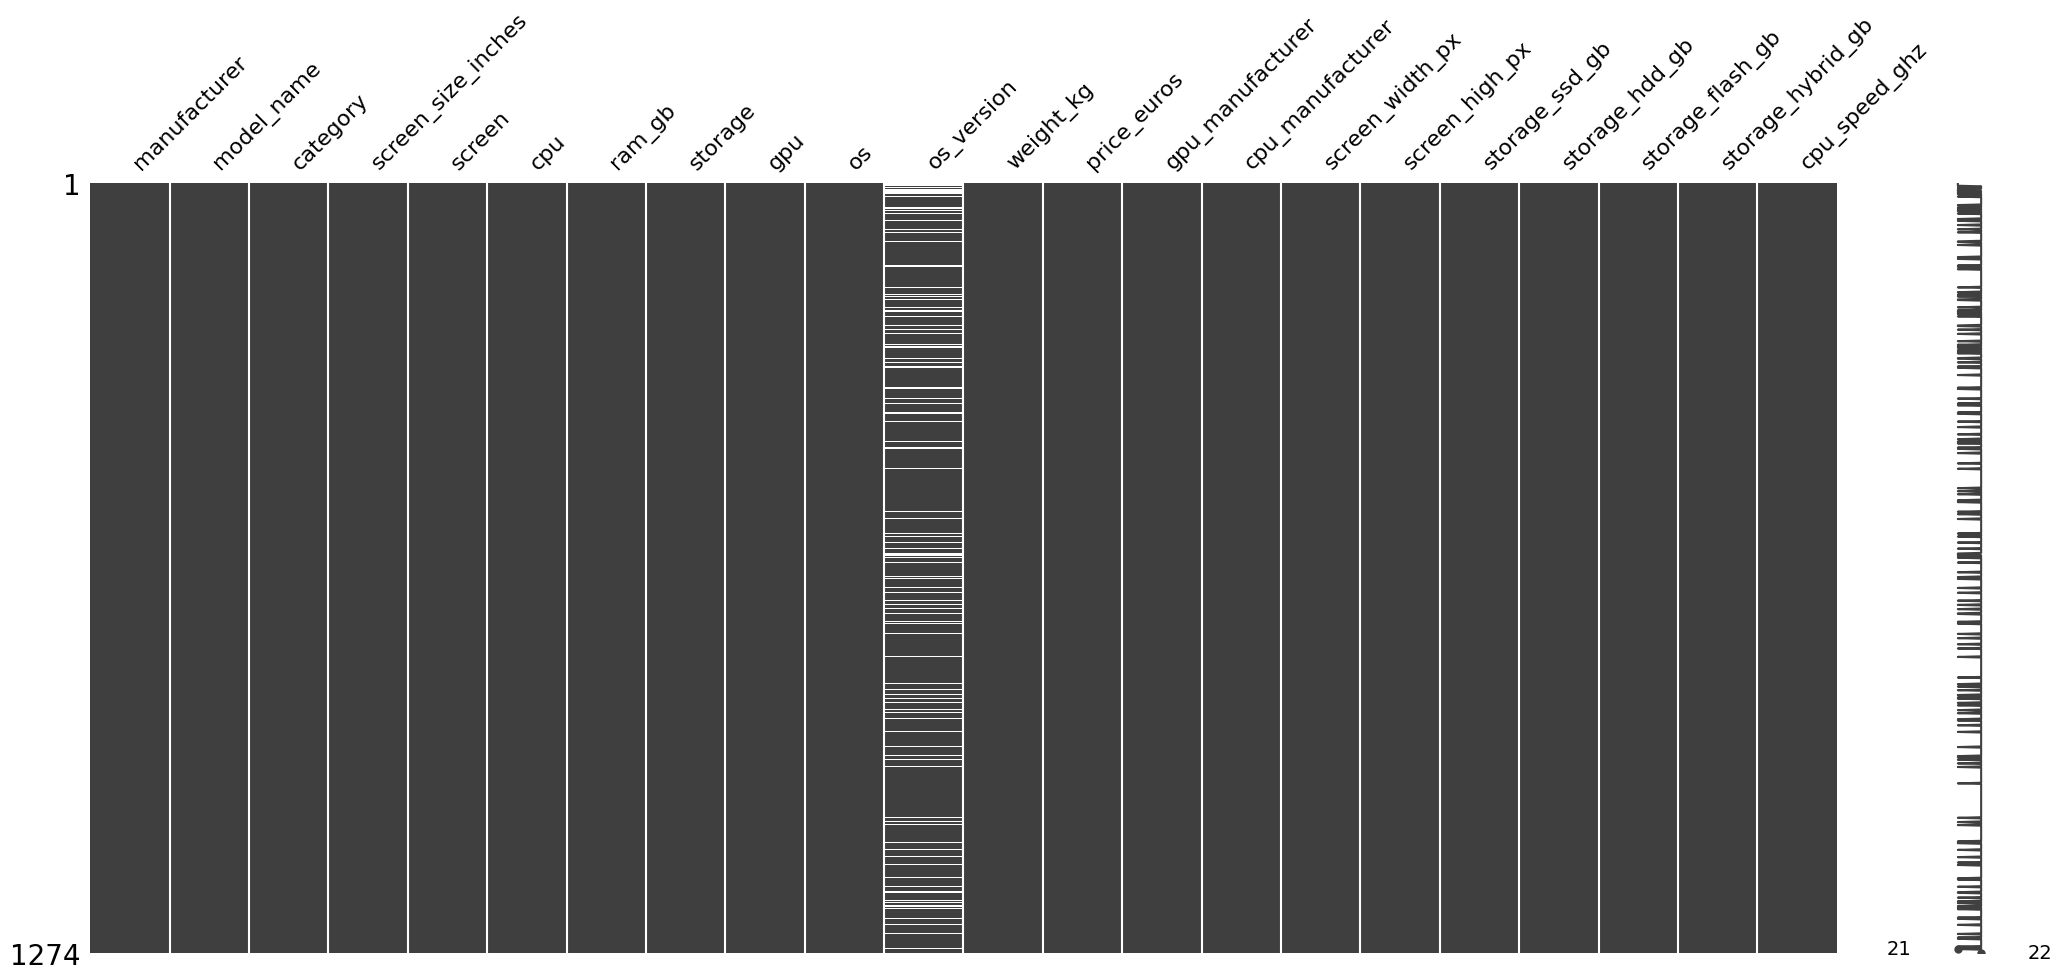

In [327]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(laptops)
plt.show()

<p>While dropping rows or columns is the easiest approach to deal with missing values, it may not always be the <em>best</em> approach. For example, removing a disproportionate amount of one manufacturer's laptops could change our analysis.</p>
<p>Because of this, it's a good idea to explore the missing values in the <code>os_version</code> column before making a decision. We can use <code>Series.value_counts()</code> to explore all of the values in the column, but we'll use a parameter we haven't seen before:</p>

In [328]:
laptops["os_version"].value_counts(dropna=False)

os_version
10      1047
NaN      166
7         45
X          8
10 S       8
Name: count, dtype: int64

<p>Because we set the <code>dropna</code> parameter to <code>False</code>, the result includes null values. We can see that the majority of values in the column are <code>10</code> and missing values are the next most common.</p>

In [329]:
# Check the os for the missing values in os_version
laptops[laptops["os_version"].isna()]["os"].value_counts()

os
no_os        66
linux        58
chrome_os    27
mac_os       13
android       2
Name: count, dtype: int64

In [330]:
laptops.loc[laptops["os"] == "no_os", "os_version"] = "no_os"
laptops[laptops["os_version"].isna()]["os"].value_counts()

os
linux        58
chrome_os    27
mac_os       13
android       2
Name: count, dtype: int64

In [258]:
laptops.loc[laptops["os"] == "mac_os", ["os", "os_version"]].head()

,os,os_version
0,mac_os,NaN
1,mac_os,NaN
3,mac_os,NaN
4,mac_os,NaN
6,mac_os,X


In [331]:
# Fill the missing values in os_version for macOS
laptops.loc[laptops["os"] == "mac_os", "os_version"] = "X"
laptops[laptops["os_version"].isna()]["os"].value_counts()

os
linux        58
chrome_os    27
android       2
Name: count, dtype: int64

In [332]:
# Fill the missing values in os_version for Windows, Chrome OS, and Android
laptops.loc[laptops["os"] == "chrome_os", "os_version"] = "Version Unknown"
laptops.loc[laptops["os"] == "android", "os_version"] = "Version Unknown"
laptops.loc[laptops["os"] == "linux", "os_version"] = "Version Unknown"
laptops[laptops["os_version"].isna()]["os"].value_counts()

Series([], Name: count, dtype: int64)

In [334]:
# No more missing values
laptops.isna().sum()

manufacturer          0
model_name            0
category              0
screen_size_inches    0
screen                0
cpu                   0
ram_gb                0
storage               0
gpu                   0
os                    0
os_version            0
weight_kg             0
price_euros           0
gpu_manufacturer      0
cpu_manufacturer      0
screen_width_px       0
screen_high_px        0
storage_ssd_gb        0
storage_hdd_gb        0
storage_flash_gb      0
storage_hybrid_gb     0
cpu_speed_ghz         0
dtype: int64

Filling in missing data with the fillna method is a special case of more general value
replacement.

In [335]:
laptops["manufacturer"].value_counts()

manufacturer
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [336]:
laptops = laptops.replace("MSI", "Micro-Star International")
laptops["manufacturer"].value_counts()

manufacturer
Dell                        291
Lenovo                      289
HP                          268
Asus                        151
Acer                        101
Micro-Star International     54
Toshiba                      48
Apple                        21
Samsung                       9
Mediacom                      7
Razer                         7
Microsoft                     6
Vero                          4
Xiaomi                        4
Chuwi                         3
Fujitsu                       3
Google                        3
LG                            3
Huawei                        2
Name: count, dtype: int64

Handling missing data is essential for ensuring dataset integrity. The choice of strategy depends on the dataset characteristics and analysis goals. Visualization techniques, deletion methods, and imputation strategies should be carefully applied based on the missing data pattern.

https://pandas.pydata.org/docs/user_guide/text.html#string-methods
https://realpython.com/python-data-cleaning-numpy-pandas/
https://github.com/hawaiidatascience/pandas_data_wrangling
https://www.tomasbeuzen.com/python-programming-for-data-science/chapters/chapter8-wrangling-basics.html#more-dataframe-operations

## Data Type Conversion

- optimizing dtypes (category, int8)

Understanding Data Types
Importance of correct data types for analysis and memory optimization.
Converting Data Types
pd.to_datetime() for date and time conversion.
df.astype() for explicit type casting.
Practical Exercise: Convert columns to appropriate data types.

## Data Transformation

### Dropping Columns 

Pandas provides a handy way of removing unwanted columns or rows from a DataFrame with the drop() function. Let’s look at a simple example where we drop a number of columns from a DataFrame.

In [ ]:
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight,price_euros,gpu_manufacturer,cpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,X,1.37kg,"1339,69",Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,X,1.34kg,"898,94",Intel,Intel


We can drop these columns in the following way:

In [ ]:
to_drop = ["category", "gpu"]

In [ ]:
laptops.drop(to_drop, axis=1).head(1)

,manufacturer,model_name,screen_size_inches,screen,cpu,ram_gb,storage,os,os_version,weight,price_euros,gpu_manufacturer,cpu_manufacturer
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,macOS,X,1.37kg,"1339,69",Intel,Intel


`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

Drop specified labels from rows or columns.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.htmlhttps://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names. When using a multi-index, labels on different levels can be removed by specifying the level.

Alternatively, we could also remove the columns by passing them to the columns parameter directly instead of separately specifying the labels to be removed and the axis where Pandas should look for the labels:

In [ ]:
laptops.drop(columns=to_drop, inplace=True)

Above, we defined a list that contains the names of all the columns we want to drop. Next, we call the drop() function on our object, passing in the inplace parameter as True and the axis parameter as 1. This tells Pandas that we want the changes to be made directly in our object and that it should look for the values to be dropped in the columns of the object.

When we inspect the DataFrame again, we’ll see that the unwanted columns have been removed:

In [ ]:
laptops.head(1)

,manufacturer,model_name,screen_size_inches,screen,cpu,ram_gb,storage,os,os_version,weight,price_euros,gpu_manufacturer,cpu_manufacturer
0,Apple,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,macOS,X,1.37kg,"1339,69",Intel,Intel


- Using Loops with pandas
- Replacing Values
- Dropping Columns  - https://realpython.com/python-data-cleaning-numpy-pandas/#dropping-columns-in-a-dataframe
- Vectorized Operations and creating new columns
- Sorting Data
- Modifying Data
- Renaming Columns
- https://realpython.com/python-data-cleaning-numpy-pandas/#cleaning-the-entire-dataset-using-the-applymap-function

Normalization & Standardization

Min-Max scaling vs. Z-score standardization

Binning & Discretization

pd.cut() for age groups, price ranges

Log/Anti-Log Transforms

Fix skewed distributions (e.g., income data)

Custom Transformations

apply() and lambda functions

Tutorial:

Normalize restaurant tip data

Convert temperature data from Fahrenheit to Celsius


Scaling and Normalization
Applying techniques like Min-Max scaling and Z-score normalization.
Encoding Categorical Variables
Using one-hot encoding (pd.get_dummies()) and label encoding.
Creating New Features
Deriving new features from existing ones to enhance analysis.
Practical Exercise: Transform and engineer features in the dataset.


Pivot Tables
Using pd.pivot_table() to summarize data.
Melting DataFrames
Using pd.melt() to transform wide-format data into long-format.
Practical Exercise: Reshape the dataset using pivot and melt operations.


## Merging & Reshaping Data

Combining Datasets

merge(), join(), and concat()

Reshaping Data

pivot_table() vs. melt()


Concatenating DataFrames
Using pd.concat() to combine DataFrames along rows or columns.
Merging and Joining DataFrames
Using pd.merge() for database-style joins.
Practical Exercise: Merge multiple datasets to create a comprehensive DataFrame.

## Handling Outliers

Detection Methods

Z-score, IQR (Interquartile Range), visual methods (boxplots)

Strategies

Capping/clipping, transformation, deletion

Tutorial:

Analyze and cap outliers in NYC restaurant inspection score data

Use seaborn.boxplot() to visualize before/after

Identifying Outliers
Using statistical methods (e.g., Z-score, IQR) to detect anomalies.
Treating Outliers
Deciding when to remove or transform outliers based on context.
Practical Exercise: Identify and handle outliers in the dataset.

## Ensuring Data Quality and Integrity

Validation Techniques

Assertions with assert df[col].isna().sum() == 0

Data validation with pandera library

Common Checks

Range validation (e.g., age ≥ 0), uniqueness constraints, cross-column logic

Tutorial:

Validate email formats in a user registration dataset

Ensure stock prices don’t have negative values

Validating Data
Implementing checks to ensure data accuracy and consistency.
Handling Incorrect Data
Identifying and correcting inaccuracies in the dataset

- saving a clean dataset

<p>In the last step of this challenge, we'll also ask you to use the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html"><code>DataFrame.to_csv()</code> method</a> to save the cleaned data to a CSV file. It's a good idea to save a CSV when you finish cleaning in case you wish to do analysis later.</p>
<p>We can use the following syntax to save a CSV:</p>
</div>


In [ ]:
df.to_csv("filename.csv", index=False)
laptops.to_csv("data/OUTPUT_laptops_cleaned.csv", index=False)

## End-to-End Data Wrangling Pipeline

Writing Reusable Wrangling Code

Creating functions and pipelines with pd.pipe()

Performance Tips

Vectorization vs. loops, 

Documentation

Tracking changes with comments/Jupyter markdown